<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Nombre y Apellido
Juan Lauría.
***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [17]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


In [18]:
import numpy as npy

def generador_senoidal (fs, f0, N, a0=1, p0=0):
    
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función
    
    dc = 0
    
    #tt = npy.linspace(0,N/fs,N)  
    tt = npy.arange(N/fs, step=1/fs)
    
    signal = a0 * npy.sin((2 * npy.pi * f0 * tt) + p0) + dc 
    
    
    # fin de la función
    
    return tt, signal


a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

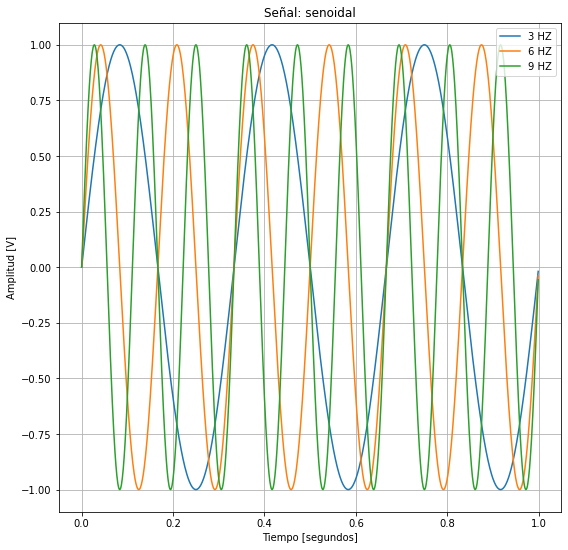

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################


t1,s1 = generador_senoidal (fs, 3, N, a0=1, p0=0)
t2,s2 = generador_senoidal (fs, 6, N, a0=1, p0=0)
t3,s3 = generador_senoidal (fs, 9, N, a0=1, p0=0)

plt.figure(1)
plt.plot(t1,s1,label='3 HZ')
plt.plot(t2,s2,label='6 HZ')
plt.plot(t3,s3,label='9 HZ')
plt.title('Señal: senoidal')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.rcParams["figure.figsize"] = (9,9)
plt.legend()
plt.grid()
plt.show()

In [32]:
def mi_ruido (N,fs,sigma,mu):
    tt = npy.arange(N/fs, step=1/fs)
    ruido = np.sqrt(sigma1) * np.random.randn(N) + mu
    
    return tt,ruido

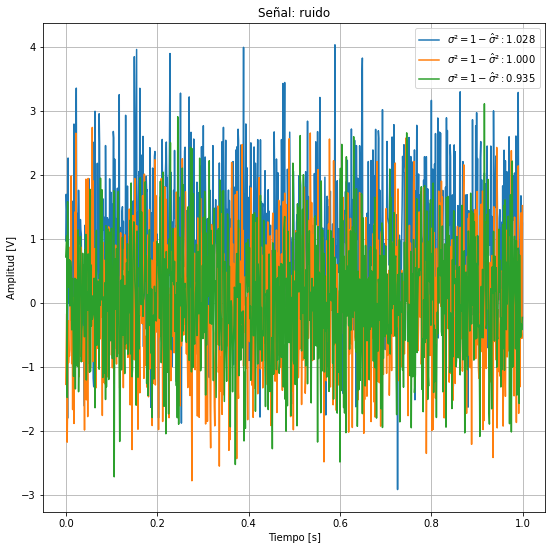

In [60]:
mu = 1
sigma1 = 1.028
sigma2 =1.000
sigma3 = 0.935

tt1,s1 = mi_ruido(N,fs,sigma1,mu)
tt2,s1 = mi_ruido(N,fs,sigma2,mu)
tt3,s1 = mi_ruido(N,fs,sigma3,mu)

plt.figure(1)
plt.plot (tt1,s1,label='$\u03C3\u00B2 = 1 - \hat \u03C3\u00B2 :1.028$')
plt.plot (tt2,s2,label='$\u03C3\u00B2 = 1 - \hat \u03C3\u00B2 :1.000$')
plt.plot (tt3,s3,label='$\u03C3\u00B2 = 1 - \hat \u03C3\u00B2 :0.935$')
plt.grid()
plt.title('Señal: ruido')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

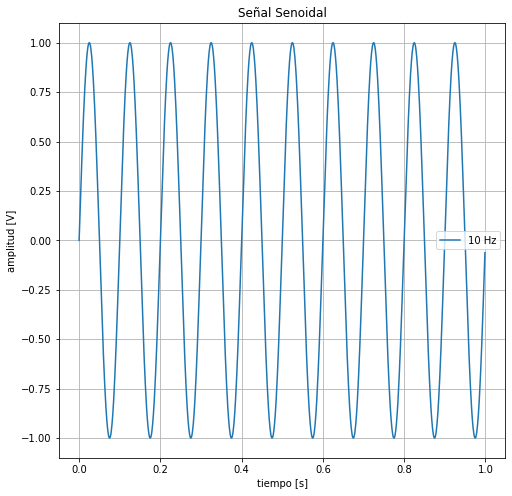

In [62]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt,xx = generador_senoidal (fs, f0, N)
plt.title('Señal Senoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud [V]')
plt.grid()
plt.plot(tt,xx,label='10 Hz')
plt.legend()
plt.rcParams["figure.figsize"] = (8,8)
plt.show()



¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, se pueden identificar los ciclos y el periodo.
</div>

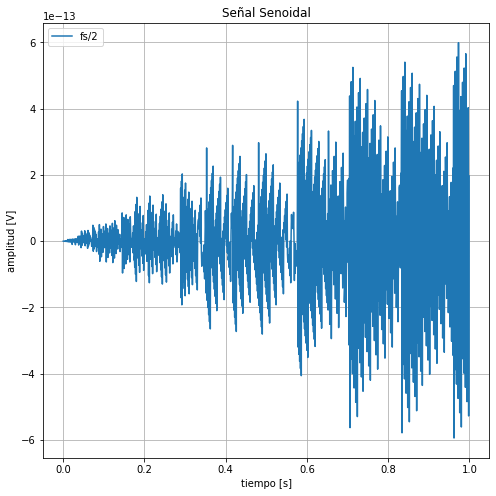

In [34]:
#################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt,xx = generador_senoidal (fs, f0, N)
plt.title('Señal Senoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud [V]')
plt.grid()
plt.plot(tt,xx,label='fs/2')
plt.legend()
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

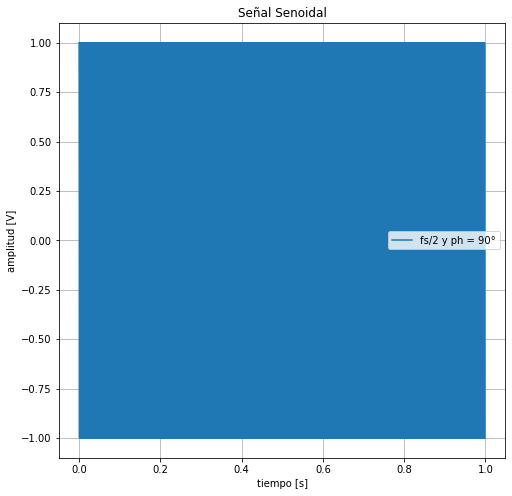

In [35]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = npy.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt,xx = generador_senoidal (fs, f0, N,a0,p0)

plt.title('Señal Senoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud [V]')
plt.grid()
plt.plot(tt,xx,label='fs/2 y ph = 90°')
plt.legend()
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> EDebido a problemas en las presición que maneja la función seno realizada.
</div>

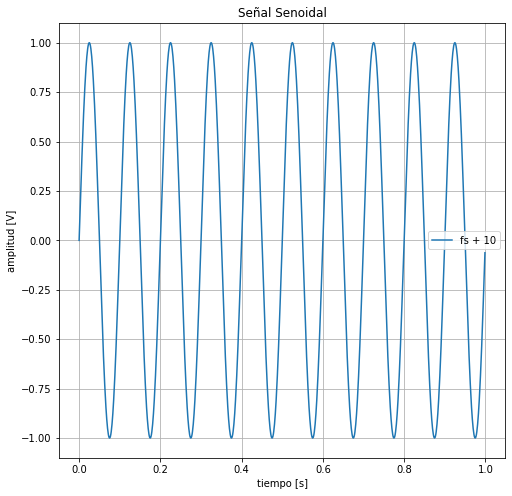

In [36]:
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt,xx = generador_senoidal (fs, f0, N)

plt.title('Señal Senoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud [V]')
plt.grid()
plt.plot(tt,xx,label='fs + 10')
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.show()


¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Aumentar la frecuencia de muestreo y así evitar el aliasing.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

In [64]:
import numpy as npy

def mi_func_DFT (xx,nn):
    
    xx_dft = npy.zeros(nn,dtype=complex)
    
    aprox = nn
    
    for k in range(nn):
            for n in range(aprox):
                xx_dft[k] = xx_dft[k] + (xx[n] * npy.exp((-2) * 1j * npy.pi * k * n / nn))
            
    return xx_dft

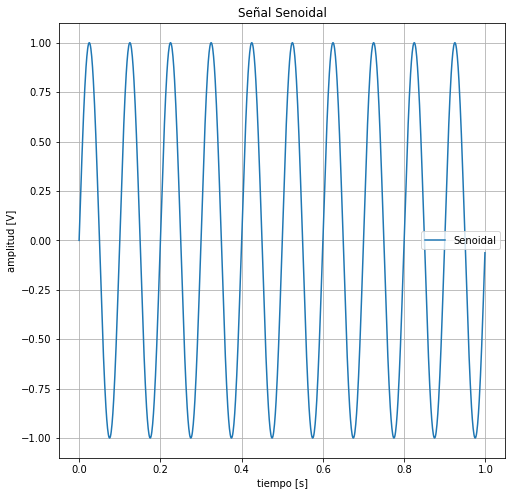

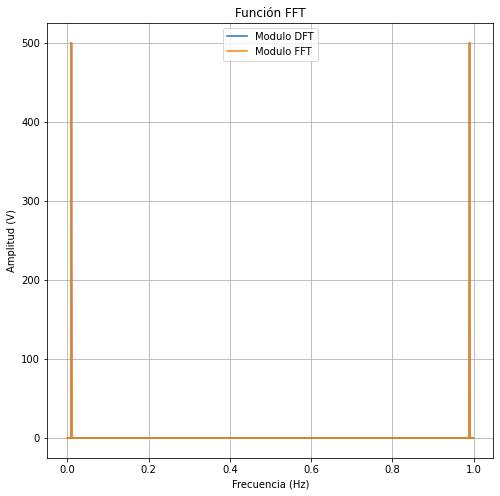

In [65]:
import matplotlib.pyplot as plt
import numpy as npy
import scipy as spy
import timeit

vmax = 1
dc = 0
fs = 1000
N = 1000
ph = npy.pi * 0

f = 10

tt,xx = generador_senoidal (fs, f, N)


xx_dft = mi_func_DFT (xx,N)
xx_fft = spy.fft.fft(xx)


plt.figure(1)
plt.title('Señal Senoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud [V]')
plt.grid()
plt.plot(tt,xx,label='Senoidal')
plt.legend()
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

plt.figure(2)
plt.plot(tt,npy.abs(xx_dft),label='Modulo DFT')
plt.title('Función DFT')
plt.plot(tt,npy.abs(xx_fft),label='Modulo FFT')
plt.title('Función FFT')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (V)')
plt.rcParams["figure.figsize"] = (8,8)
plt.grid()

plt.show()

Realicé un ploteo del módulo de la DFT desarrollada y la FFT. Como se observa, la DFT de una señal senoidal corresponde a una delta en la frecuencia de dicha señal.

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [68]:
import time

the_start = time.time()
print("hello")
the_end = time.time()
print(the_end - the_start)


hello
0.0005061626434326172


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [142]:
#######################################
# Tu simulación que genere resultados #
#######################################

# Listas de muestras y tiempos.

muestras = [16,32,64,128,256,512,1024,2048]
tus_resultados = ['--','--']

for i in range(len(muestras)):
    tt,xx = generador_senoidal (fs, f, muestras[i])
    the_start1 = time.time()
    xx_dft = mi_func_DFT (xx,muestras[i])
    the_end1 = time.time()
    
    vdt_dft.append(the_end1 - the_start)
    
    the_start = time.time()
    xx_fft = spy.fft.fft(xx,muestras[i])
    the_end = time.time()
    
    vdt_fft.append(the_end - the_start)

print('Listo.')

Listo.


In [143]:
from pandas import DataFrame
from IPython.display import HTML

tus_resultados = [ ['--'], 
                   [vdt_dft[0]], # <-- acá debería haber numeritos :)
                   [vdt_dft[1]], # <-- acá debería haber numeritos :)
                   [vdt_dft[2]], # <-- acá debería haber numeritos :)
                   [vdt_dft[3]], # <-- acá debería haber numeritos :)
                   [vdt_dft[4]], # <-- acá debería haber numeritos :)
                   [vdt_dft[5]], # <-- acá debería haber numeritos :)
                   [vdt_dft[6]], # <-- acá debería haber numeritos :)
                   [vdt_dft[7]]  # <-- acá debería haber numeritos :)
                 ]


df = DataFrame(tus_resultados, columns=['tiempo transcurrido usando DFT propia (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido usando DFT propia (s)
Tamaño de la señal N,--
16,0.00276494
32,0.0116601
64,0.0507367
128,0.202293
256,0.810561
512,3.24246
1024,13.7954
2048,47.0429


El algoritmo para obtener la DFT desarrollado tiene un tiempo de ejecución mucho mayor comparado con la FFT de numpy. A mayor cantidad de muestras N, más demora tendrá al ejecutarse.

<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

In [17]:
import numpy as npy

def mi_func_sen (vmax, dc, ff, ph, nn, fs):
    
   tt = npy.arange(nn/fs, step=1/fs)          
   
   xx = vmax * npy.sin((2 * npy.pi * ff * tt) + ph) + dc
   
   return tt,xx

In [18]:
import numpy as npy
import matplotlib.pyplot as plt
import scipy as spy

def fft_modulo_fase (tt,senial,fs,N):
    df = fs / N
    ff = npy.linspace(0, (N-1)*df, N).flatten()
    
    #senial_fft = npy.fft.fft(senial)
    senial_fft = spy.fft.fft(senial)

    modulo = npy.abs(senial_fft)
    fase = npy.angle (senial_fft)
    fase [modulo < 1] = 0
    
    return ff[ff <= fs/2],(2/N)*modulo[ff <= fs/2],fase[ff <= fs/2]

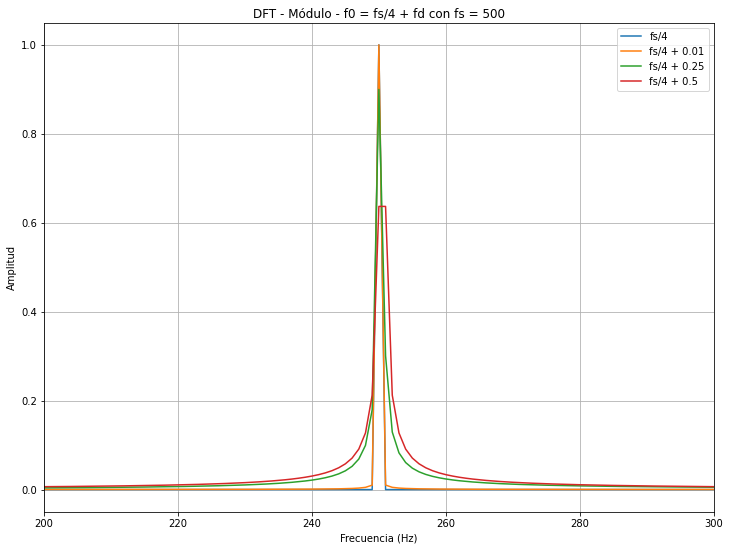

In [19]:
import numpy as npy
import matplotlib.pyplot as plt

vmax = 1
dc = 0
ff = 10
ph = 0
N = 1000
fs = 1000

fd = [0.01,0.25,0.5]
f0 = [fs/4, fs/4 + fd[0], fs/4 + fd[1], fs/4 + fd[2]]

tt1,senial1 = mi_func_sen (vmax, dc, f0[0], ph, N, fs)
tt2,senial2 = mi_func_sen (vmax, dc, f0[1], ph, N, fs)
tt3,senial3 = mi_func_sen (vmax, dc, f0[2], ph, N, fs)
tt4,senial4 = mi_func_sen (vmax, dc, f0[3], ph, N, fs)

ff1,mod1,fas1 = fft_modulo_fase(tt1,senial1,fs,N)
ff2,mod2,fas2 = fft_modulo_fase(tt1,senial2,fs,N)
ff3,mod3,fas2 = fft_modulo_fase(tt1,senial3,fs,N)
ff4,mod4,fas1 = fft_modulo_fase(tt1,senial4,fs,N)

plt.figure(1)
plt.plot(ff1,mod1,label='fs/4')
plt.plot(ff2,mod2,label='fs/4 + 0.01')
plt.plot(ff3,mod3,label='fs/4 + 0.25')
plt.plot(ff4,mod4,label='fs/4 + 0.5')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('DFT - Módulo - f0 = fs/4 + fd con fs = 500')
plt.legend()
plt.grid()
plt.xlim(200,300)
plt.rcParams["figure.figsize"] = (12,9)
plt.show()


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [20]:
#######################################
# Tu simulación que genere resultados #
#######################################

from pandas import DataFrame
from IPython.display import HTML

tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [mod1[250], mod1[251], npy.sum(mod1[ff1 != 250 ])], # <-- acá debería haber numeritos :)
                  [mod2[250], mod2[251], npy.sum(mod2[ff2 != 250])], # <-- acá debería haber numeritos :)
                  [mod3[250], mod3[251], npy.sum(mod3[ff3 != 250])], # <-- acá debería haber numeritos :)
                  [mod4[250], mod4[251], npy.sum(mod4[ff4 != 250])], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1,2.02323e-14,1.01728e-12
$f_S/4+0.01$,0.999834,0.0101014,0.126839
$f_S/4+0.25$,0.899609,0.300813,2.80629
$f_S/4+0.5$,0.636618,0.636624,4.28424


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

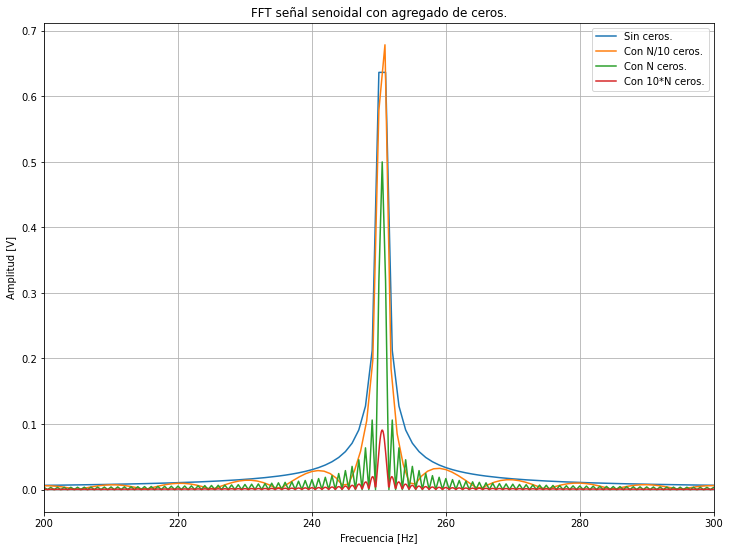

In [21]:
# Inserte aquí su código

vmax = 1
dc = 0
ph = 0
N = 1000
fs = 1000

f0 = fs / 4 + 0.5
tt,senial = mi_func_sen (vmax, dc, f0, ph, N, fs)

ff_o,mod_o,fas_o = fft_modulo_fase(tt,senial,fs,N)

ceros1 = npy.zeros(int(N/10))
ceros2 = npy.zeros(int(N))
ceros3 = npy.zeros(int(N*10))

senial01= npy.append(senial,ceros1)
senial02= npy.append(senial,ceros2)
senial03= npy.append(senial,ceros3)

ff1,mod1,fas1 = fft_modulo_fase(tt,senial01,fs,N + int(N/10))
ff2,mod2,fas2 = fft_modulo_fase(tt,senial02,fs,N+N)
ff3,mod3,fas3 = fft_modulo_fase(tt,senial03,fs,N + int(N*10))

plt.figure(1)
plt.plot(ff_o,mod_o, label='Sin ceros.' )
plt.plot(ff1, mod1, label='Con N/10 ceros.')
plt.plot(ff2, mod2, label='Con N ceros.')
plt.plot(ff3, mod3, label='Con 10*N ceros.')
plt.title('FFT señal senoidal con agregado de ceros.')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')
plt.rcParams["figure.figsize"] = (12,9)
plt.xlim(200,300)
plt.grid()
plt.legend()
plt.show()


**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, se observa que a medida que se aumenta la cantidad de ceros que se agrega, la resolución espectral aumenta.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al alargar el tiempo de duración de la señal agregando ceros al final de la misma se observa que al realizar la FFT en cada caso, el módulo de la señal resultante se va asemejando al módulo de una función sinc.

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [3]:
"""
#######################################
# Tu simulación que genere resultados #
#######################################

# Para cada módulo obtenido, encuentro el valor máximo.
max_o = npy.max(mod_o)
max1 = npy.max(mod1)
max2 = npy.max(mod2)
max3 = npy.max(mod3)

#print('Valores máximos: ',maxO,max1,max2,max3)
#print('Frecuencias: ',ff_o[mod_o == max_o],ff1[mod1 == max1],ff2[mod2 == max2],ff3[mod3 == max3])

# Armo una lista de las frecuencias correspondientes al valor máximo.
lista = [ff_o[mod_o == max_o],ff1[mod1 == max1],ff2[mod2 == max2],ff3[mod3 == max3]]
porcentual = [] 
f0 = 250.5

for i in range(len(lista)):
    x = npy.abs( (f0-lista[i]) * 100 / f0 ) 
    porcentual.append(float(x)) # Aquí coloco las diferencias porcentuales de frecuencias.


tus_resultados = [[ff_o[mod_o == max_o],porcentual[0]], # <-- acá debería haber numeritos :)
                  [ff1[mod1 == max1],porcentual[1]],# <-- acá debería haber numeritos :)
                  [ff2[mod2 == max2],porcentual[2]], # <-- acá debería haber numeritos :)
                  [ff3[mod3 == max3],porcentual[3]],# <-- acá debería haber numeritos :)
                 ]

df = DataFrame(tus_resultados, columns=['$f_0$', '$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())
"""

"\n#######################################\n# Tu simulación que genere resultados #\n#######################################\n\n# Para cada módulo obtenido, encuentro el valor máximo.\nmax_o = npy.max(mod_o)\nmax1 = npy.max(mod1)\nmax2 = npy.max(mod2)\nmax3 = npy.max(mod3)\n\n#print('Valores máximos: ',maxO,max1,max2,max3)\n#print('Frecuencias: ',ff_o[mod_o == max_o],ff1[mod1 == max1],ff2[mod2 == max2],ff3[mod3 == max3])\n\n# Armo una lista de las frecuencias correspondientes al valor máximo.\nlista = [ff_o[mod_o == max_o],ff1[mod1 == max1],ff2[mod2 == max2],ff3[mod3 == max3]]\nporcentual = [] \nf0 = 250.5\n\nfor i in range(len(lista)):\n    x = npy.abs( (f0-lista[i]) * 100 / f0 ) \n    porcentual.append(float(x)) # Aquí coloco las diferencias porcentuales de frecuencias.\n\n\ntus_resultados = [[ff_o[mod_o == max_o],porcentual[0]], # <-- acá debería haber numeritos :)\n                  [ff1[mod1 == max1],porcentual[1]],# <-- acá debería haber numeritos :)\n                  [ff2[mod2 

<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [23]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [24]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [25]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [26]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [27]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [28]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [29]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [30]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [31]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [32]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [33]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [34]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [35]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>